##Atividade
Escolha uma base de dados no https://www.kaggle.com/datasets, e se familiarize com sua base.

Procure realizar a previsão (inferência) de uma variável categórica através de um kNN. Se certifique de medir seus níveis de assertividade. Esteja a vontade a realizar mais de um e compará-los.

Não esqueça de junto com seus códigos realizar suas análises/conclusões (use o botão de +Texto).

Banco de dados usado: https://www.kaggle.com/datasets/uciml/iris

In [192]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [193]:
df = pd.read_csv('/content/Iris.csv')

In [194]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [195]:
df.shape

(150, 6)

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [197]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [198]:
df_X = df.drop(['Id', 'Species'], axis=1)
df_y = df['Species']

In [199]:
X_treino, X_teste, y_treino, y_teste = train_test_split(df_X, df_y, test_size=0.20, random_state= 20)

In [200]:
knn = KNeighborsClassifier(n_neighbors=3)

In [201]:
knn.fit(X_treino, y_treino)

KNeighborsClassifier(n_neighbors=3)

In [202]:
acc_treino= knn.score(X_treino,y_treino)
print('Acuracia Treino:',acc_treino*100)

Acuracia Treino: 97.5


In [203]:
previsao = knn.predict(X_teste)
previsao

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica'], dtype=object)

In [204]:
accuracy_score = accuracy_score(y_teste,previsao)
print('Acuracia Teste:',accuracy_score*100)

Acuracia Teste: 93.33333333333333


In [205]:
confusion_matrix = confusion_matrix(y_teste,previsao)
confusion_matrix

array([[ 8,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 10]])

<Axes: >

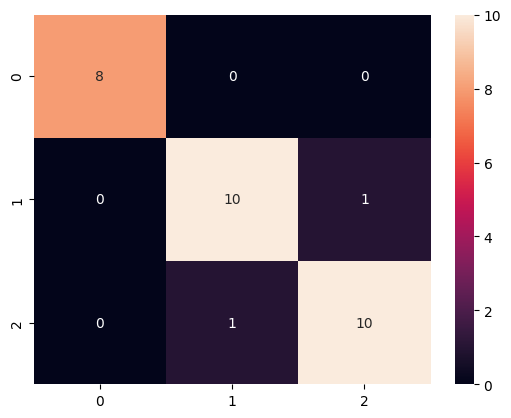

In [206]:
sns.heatmap(confusion_matrix, annot=True, fmt='d')

In [207]:
print(classification_report(y_teste,previsao))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.93      0.93      0.93        30



##Conclusões
Iris-setosa:

Precision: 1.00 (100%) – Todas as previsões da classe estavam corretas.

Recall: 1.00 (100%) – O modelo identificou corretamente todas as instâncias da classe Iris-setosa.

Iris-versicolor:


Precision: 0.91 (91%) – O modelo previu corretamente 91% das classes.

Recall: 0.91 (91%) – O modelo identificou corretamente 91% das instâncias dessa classe.

Iris-virginica:


Precision: 0.91 (91%) – O modelo previu corretamente 91% das classes.

Recall: 0.91 (91%) – O modelo identificou corretamente 91% das instâncias dessa classe.

O modelo desempenhou bem, com uma acurácia de treino de 97% e acurácia de teste de 93% Ele conseguiu classificar corretamente todas as espécies de Iris-setosa e Iris-virginica, enquanto teve um pequeno erro ao identificar algumas espécies de Iris-versicolor.